# 🍴 Zomato Restaurants Data Analysis  

Author: Anvitha N 


Tools Used: Python, Pandas, Matplotlib, Seaborn, Jupyter Notebook  

# 🧠 Objective
Analyze Zomato restaurant data to uncover insights about customer preferences, restaurant ratings, and pricing trends.

# 📊 Summary
- Cleaned and preprocessed real-world Zomato data  
- Performed detailed exploratory data analysis (EDA)  
- Visualized patterns in ratings, costs, online orders, and cuisines  
- Extracted 5 actionable business insights  


In [83]:
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir())


['.ipynb_checkpoints', 'Zomato Analysis.ipynb', 'zomato.csv']


In [84]:
import pandas as pd


In [85]:
df=pd.read_csv('zomato.csv',encoding='latin-1')

In [86]:
print(df.shape)

(51717, 17)


In [87]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [89]:
print("Missing values per column:\n",df.isnull().sum())

Missing values per column:
 url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [90]:
print("\nDuplicate rows:",df.duplicated().sum())


Duplicate rows: 0


In [91]:
import numpy as np

# --- Clean the 'approx_cost(for two people)' column ---
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)                      # make sure it's a string
    .str.replace(',', '', regex=False)  # remove commas like '1,200' -> '1200'
    .replace('nan', np.nan)           # handle 'nan' strings
    .astype(float)                    # convert to numeric
)

# --- Clean and fill missing values ---
# Fill categorical columns with most common or 'Not Specified'
df['rate'] = df['rate'].fillna('Not Rated')
df['phone'] = df['phone'].fillna('Not Available')
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines'] = df['cuisines'].fillna('Not Specified')

# Fill numeric column with median cost
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(
    df['approx_cost(for two people)'].median()
)

# Drop columns not very useful or too sparse
df.drop(['dish_liked'], axis=1, inplace=True)

# --- Check if any missing values left ---
print("Missing values per column after cleaning:\n", df.isnull().sum())

Missing values per column after cleaning:
 url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64


In [92]:
# Clean the 'rate' column safely
df['rate'] = df['rate'].astype(str)  # convert all to string
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())  # remove '/5'

# replace text values like 'NEW', '-', 'Not Rated' with NaN
df['rate'] = df['rate'].replace(['NEW', '-', 'Not Rated'], np.nan)

# now safely convert to float
df['rate'] = df['rate'].astype(float)

# fill missing ratings with the mean
df['rate'] = df['rate'].fillna(df['rate'].mean())

# check results
print(df['rate'].head(10))

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rate, dtype: float64


In [93]:
import numpy as np

# Convert to string (so we can work safely with text)
df['rate'] = df['rate'].astype(str)

# Remove '/5' part and extra spaces
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())

# Replace unwanted text like 'NEW', '-', 'Not Rated' with NaN
df['rate'] = df['rate'].replace(['NEW', '-', 'Not Rated'], np.nan)

# Now convert everything that remains to float (numbers)
df['rate'] = df['rate'].astype(float)

# Fill missing ratings with average of other ratings
df['rate'].fillna(df['rate'].mean(), inplace=True)

# Check first few rows
print(df['rate'].head(10))

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rate, dtype: float64


In [94]:
df['rate'] = df['rate'].astype(str)
df['rate'] = df['rate'].apply(lambda x: x.replace('/5', '').strip())
df['rate'] = df['rate'].replace(['NEW', '-', 'Not Rated'], np.nan)
df['rate'] = df['rate'].astype(float)
df['rate'] = df['rate'].fillna(df['rate'].mean())  # ✅ safe and clean
print(df['rate'].head(10))


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
5    3.8
6    3.6
7    4.6
8    4.0
9    4.2
Name: rate, dtype: float64


In [95]:
# Basic info
print("Shape of dataset:", df.shape)
print("\nColumn names:\n", df.columns)
print("\nData types:\n")
print(df.dtypes)

# Summary statistics (for numeric columns)
print("\nSummary statistics:\n")
print(df.describe())

Shape of dataset: (51717, 16)

Column names:
 Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

Data types:

url                             object
address                         object
name                            object
online_order                    object
book_table                      object
rate                           float64
votes                            int64
phone                           object
location                        object
rest_type                       object
cuisines                        object
approx_cost(for two people)    float64
reviews_list                    object
menu_item                       object
listed_in(type)                 object
listed_in(city)                 object
dtype: object

Summary statistics:

            

In [96]:
print("\nOnline Order Distribution:")
print(df['online_order'].value_counts())

print("\nBook Table Distribution:")
print(df['book_table'].value_counts())


Online Order Distribution:
online_order
Yes    30444
No     21273
Name: count, dtype: int64

Book Table Distribution:
book_table
No     45268
Yes     6449
Name: count, dtype: int64


In [97]:
print("\nTop 10 locations with most restaurants:")
print(df['location'].value_counts().head(10))


Top 10 locations with most restaurants:
location
BTM                      5145
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Name: count, dtype: int64


In [98]:
print("\nMost common restaurant types:")
print(df['rest_type'].value_counts().head(10))


Most common restaurant types:
rest_type
Quick Bites           19359
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64


In [99]:
avg_rating_by_location = df.groupby('location')['rate'].mean().sort_values(ascending=False)
print("\nTop 10 locations by average rating:")
print(avg_rating_by_location.head(10))


Top 10 locations by average rating:
location
Lavelle Road             4.107408
St. Marks Road           4.009102
Koramangala 3rd Block    3.983385
Koramangala 5th Block    3.983260
Church Street            3.980334
Sankey Road              3.955572
Cunningham Road          3.894516
Koramangala 4th Block    3.880904
Rajarajeshwari Nagar     3.850000
Residency Road           3.846713
Name: rate, dtype: float64


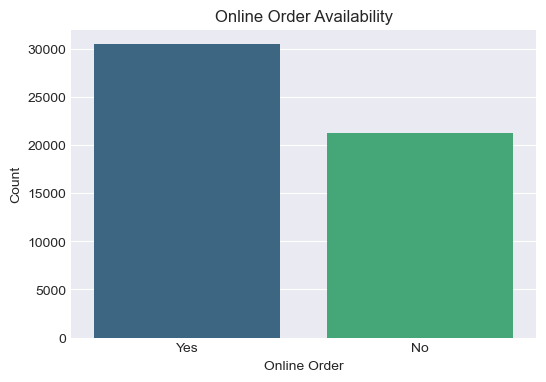

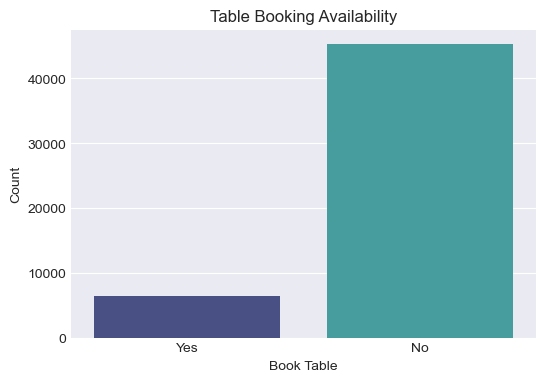

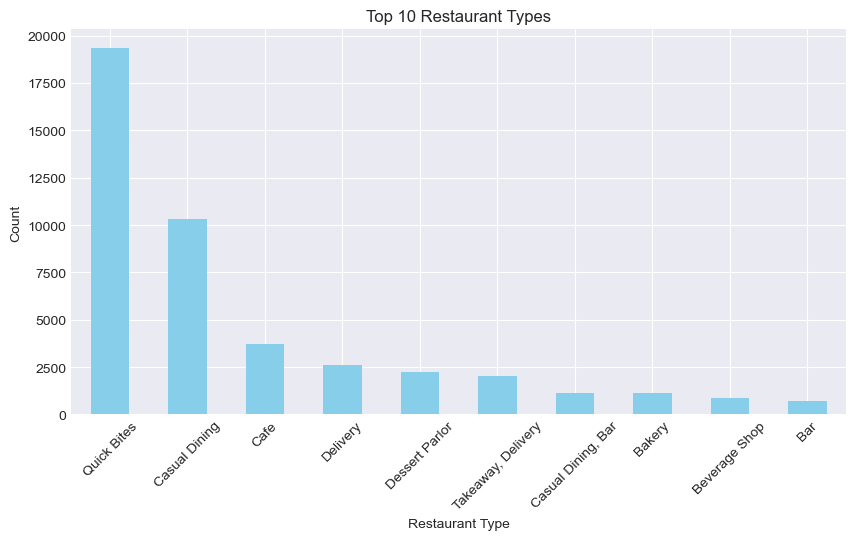

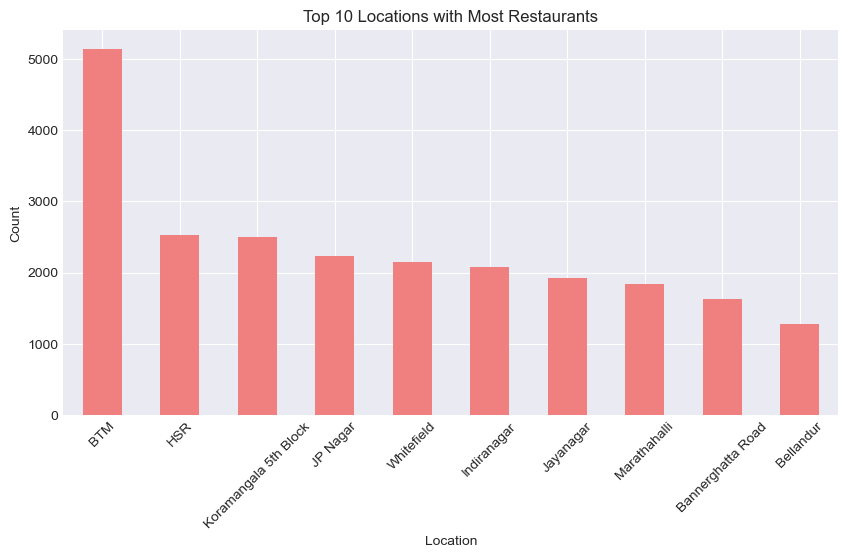

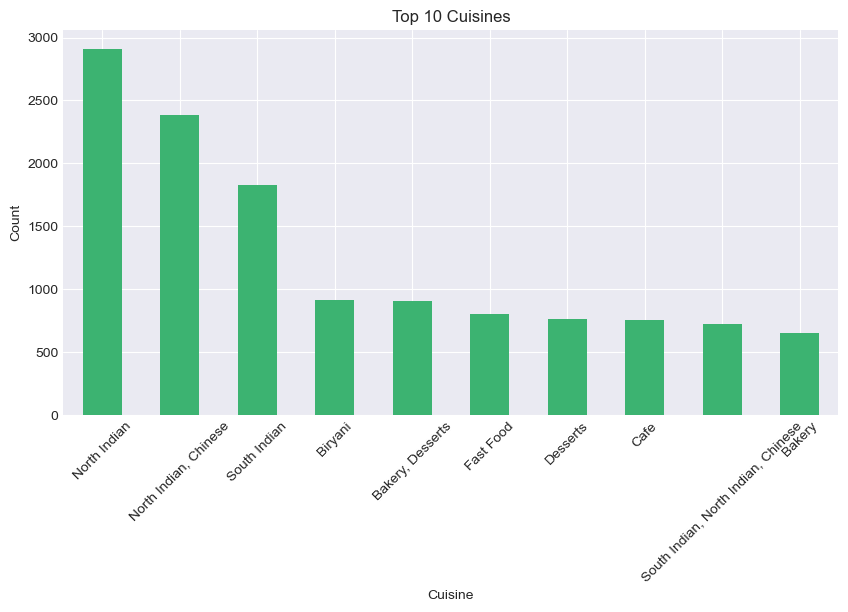

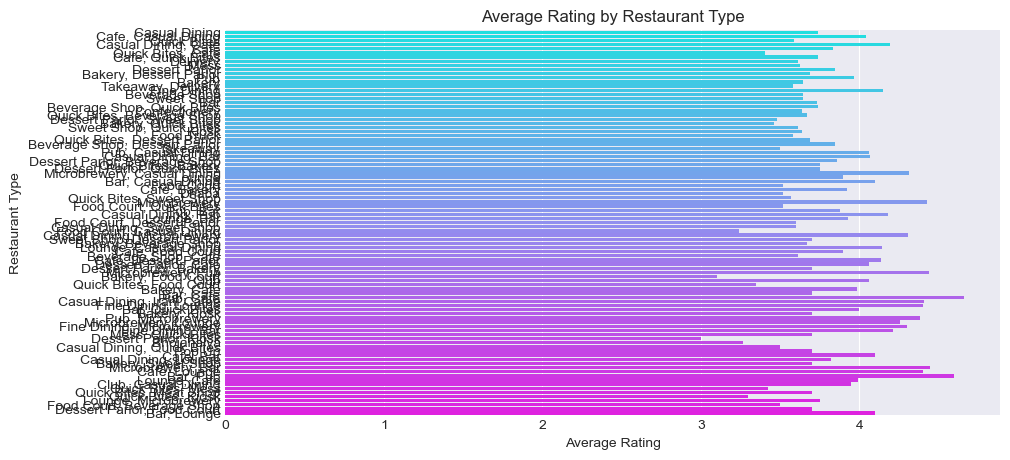

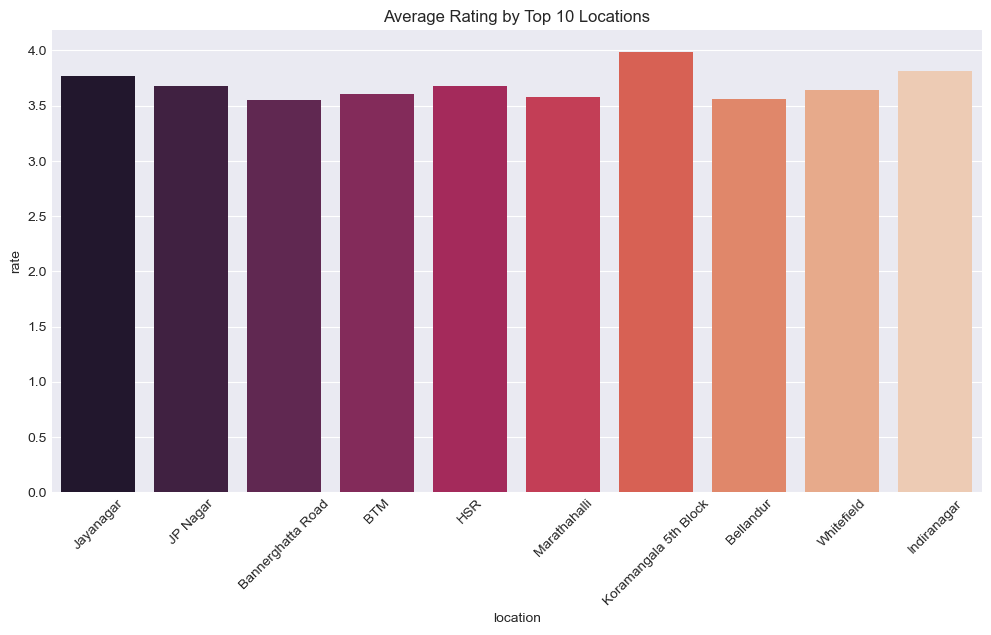

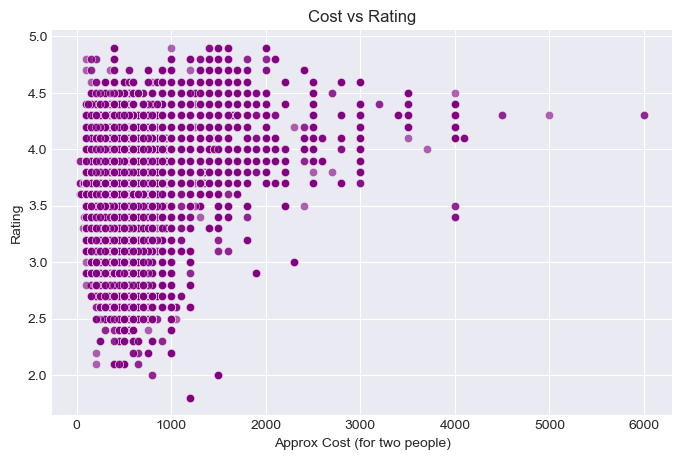

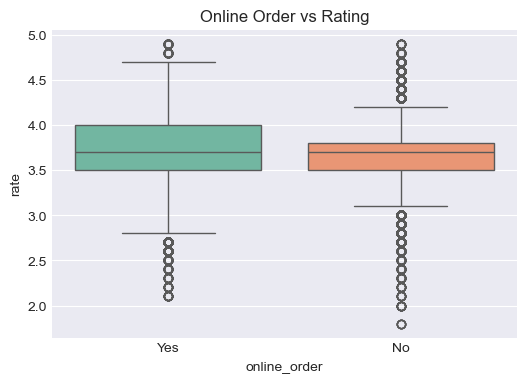

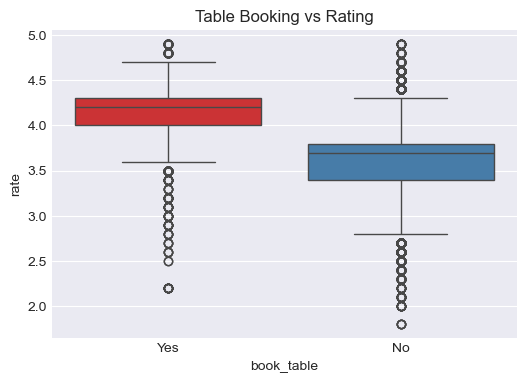

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-darkgrid')

# 1️⃣ Online Order Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='online_order', data=df, palette='viridis')
plt.title('Online Order Availability')
plt.xlabel('Online Order')
plt.ylabel('Count')
plt.show()

# 2️⃣ Table Booking Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='book_table', data=df, palette='mako')
plt.title('Table Booking Availability')
plt.xlabel('Book Table')
plt.ylabel('Count')
plt.show()

# 3️⃣ Most Common Restaurant Types
plt.figure(figsize=(10,5))
df['rest_type'].value_counts()[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 4️⃣ Most Common Locations
plt.figure(figsize=(10,5))
df['location'].value_counts()[:10].plot(kind='bar', color='lightcoral')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 5️⃣ Top 10 Cuisines
plt.figure(figsize=(10,5))
df['cuisines'].value_counts()[:10].plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# 6️⃣ Average Rating by Restaurant Type
plt.figure(figsize=(10,5))
sns.barplot(x='rate', y='rest_type', data=df, estimator='mean', palette='cool', errorbar=None)
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Average Rating')
plt.ylabel('Restaurant Type')
plt.show()

# 7️⃣ Average Rating by Location (Top 10)
plt.figure(figsize=(12,6))
top10_locations = df['location'].value_counts().head(10).index
sns.barplot(x='location', y='rate', data=df[df['location'].isin(top10_locations)],
            estimator='mean', palette='rocket', errorbar=None)
plt.title('Average Rating by Top 10 Locations')
plt.xticks(rotation=45)
plt.show()

# 8️⃣ Cost vs Rating Relationship
plt.figure(figsize=(8,5))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df, color='purple', alpha=0.6)
plt.title('Cost vs Rating')
plt.xlabel('Approx Cost (for two people)')
plt.ylabel('Rating')
plt.show()

# 9️⃣ Online Order vs Rating
plt.figure(figsize=(6,4))
sns.boxplot(x='online_order', y='rate', data=df, palette='Set2')
plt.title('Online Order vs Rating')
plt.show()

# 🔟 Table Booking vs Rating
plt.figure(figsize=(6,4))
sns.boxplot(x='book_table', y='rate', data=df, palette='Set1')
plt.title('Table Booking vs Rating')
plt.show()

In [101]:
# Convert 'rate' column safely to numeric
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Check if it worked
print(df['rate'].dtype)
print(df['rate'].isna().sum(), "missing ratings")

float64
0 missing ratings


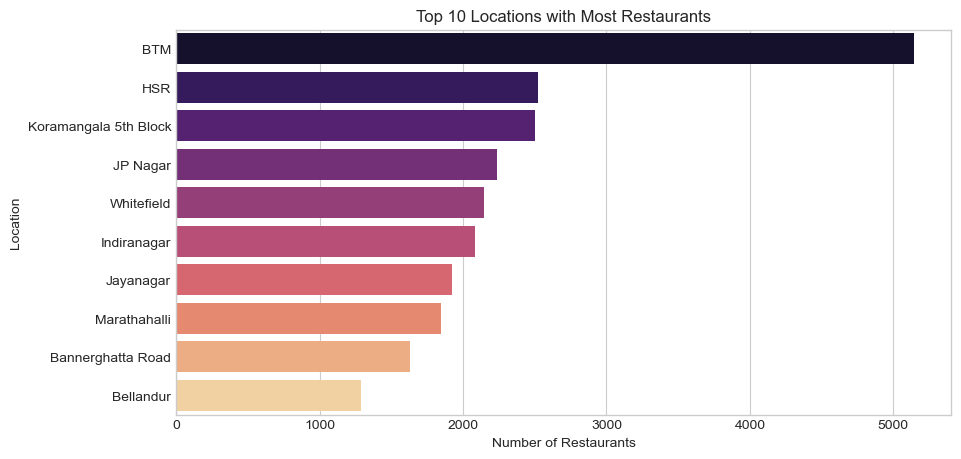

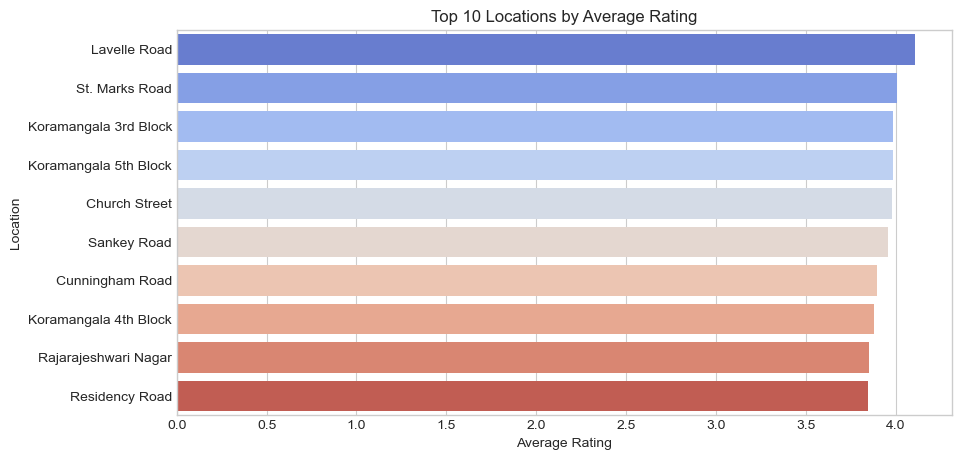

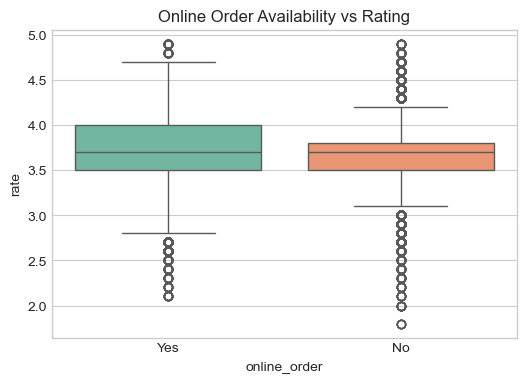

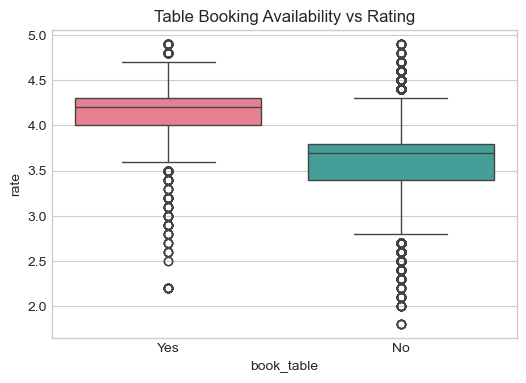

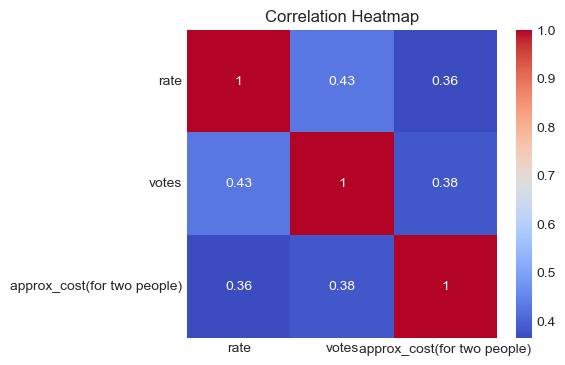

In [102]:


import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')

# 1️⃣ Top 10 locations with most restaurants
plt.figure(figsize=(10,5))
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='magma')
plt.title('Top 10 Locations with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Location')
plt.show()

# 2️⃣ Average rating by location (top 10)
plt.figure(figsize=(10,5))
avg_rating = df.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='coolwarm')
plt.title('Top 10 Locations by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Location')
plt.show()

# 3️⃣ Online order vs rating
plt.figure(figsize=(6,4))
sns.boxplot(x='online_order', y='rate', data=df, palette='Set2')
plt.title('Online Order Availability vs Rating')
plt.show()

# 4️⃣ Table booking vs rating
plt.figure(figsize=(6,4))
sns.boxplot(x='book_table', y='rate', data=df, palette='husl')
plt.title('Table Booking Availability vs Rating')
plt.show()

# 5️⃣ Correlation heatmap for numeric columns
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [103]:
# Key insights summary

print("🔹 INSIGHTS FROM ZOMATO DATA ANALYSIS 🔹\n")

# 1️⃣ Top restaurant areas
top_location = df['location'].value_counts().idxmax()
print(f"1. The highest number of restaurants are located in {top_location} area.")

# 2️⃣ Online order preference
online_orders = df['online_order'].value_counts(normalize=True).mul(100).round(2)
print(f"2. {online_orders['Yes']}% of restaurants offer online orders, showing a strong customer preference for delivery services.")

# 3️⃣ Table booking availability
table_book = df['book_table'].value_counts(normalize=True).mul(100).round(2)
print(f"3. {table_book['Yes']}% of restaurants provide table booking — indicating dine-in is still relevant.")

# 4️⃣ Cost insights
avg_cost = df['approx_cost(for two people)'].mean()
print(f"4. The average cost for two people across restaurants is ₹{avg_cost:.0f}.")

# 5️⃣ Rating trend
avg_rating = df['rate'].mean()
print(f"5. The average restaurant rating is {avg_rating:.2f}/5, suggesting moderate satisfaction levels overall.")

print("\n✅ Analysis Completed — Data Cleaned, Visualized & Insights Extracted.")

🔹 INSIGHTS FROM ZOMATO DATA ANALYSIS 🔹

1. The highest number of restaurants are located in BTM area.
2. 58.87% of restaurants offer online orders, showing a strong customer preference for delivery services.
3. 12.47% of restaurants provide table booking — indicating dine-in is still relevant.
4. The average cost for two people across restaurants is ₹554.
5. The average restaurant rating is 3.70/5, suggesting moderate satisfaction levels overall.

✅ Analysis Completed — Data Cleaned, Visualized & Insights Extracted.
